In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("data/indian_liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [6]:
print(df.columns)
df.isnull().sum()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease: 416
Number of patients not diagnosed with liver disease: 167


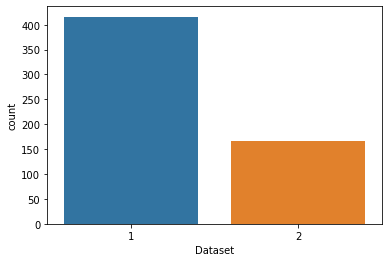

In [7]:
sns.countplot(data=df, x = 'Dataset', label='Count')
LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: {}'.format(LD))
print('Number of patients not diagnosed with liver disease: {}'.format(NLD))

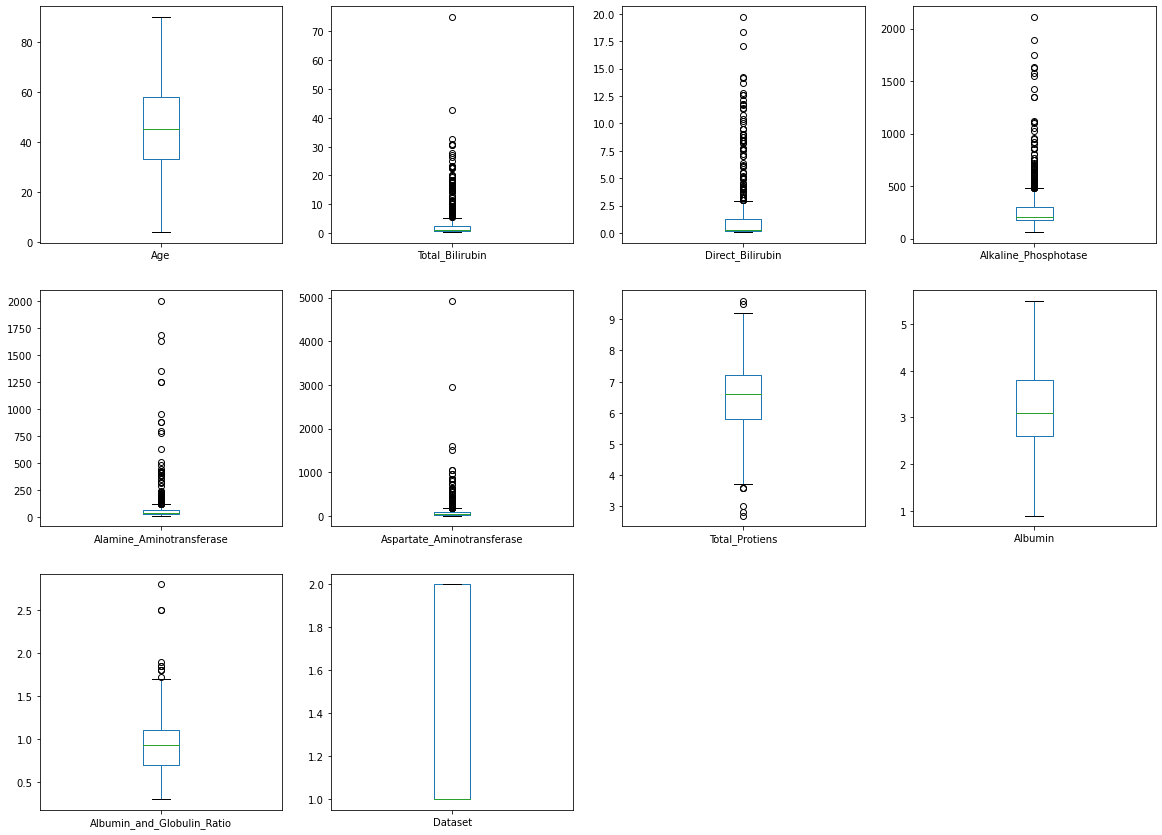

In [13]:
df.plot(kind='box', subplots=True, layout=(4,4),sharex=False,sharey=False ,figsize =(20,20))
plt.show()

In [57]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)


1

In [45]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [46]:
X=df.drop("Dataset",axis=1)
y = df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [49]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


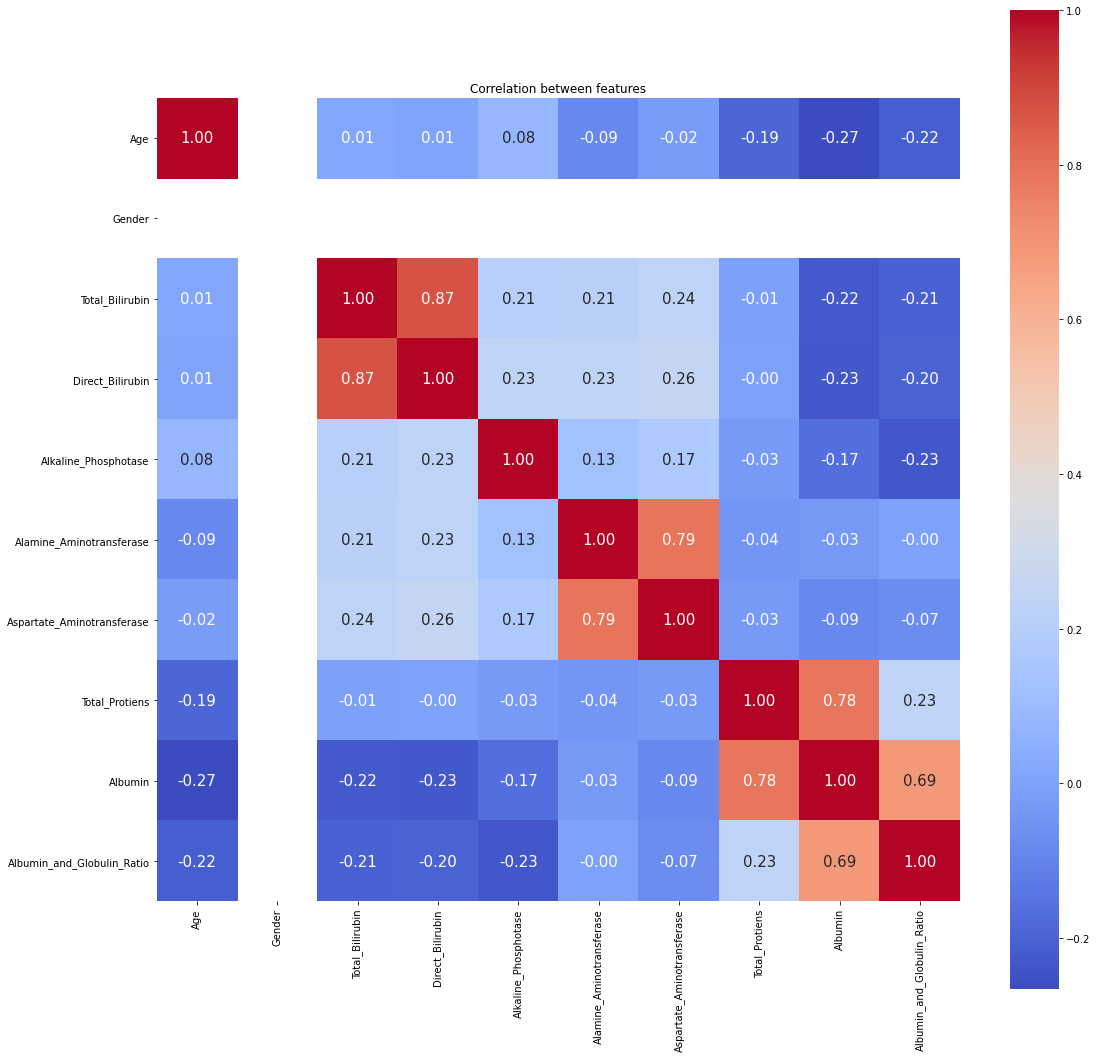

In [50]:
liver_corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [63]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

patients=pd.read_csv('indian_liver_patient.csv')
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)
patients=patients.fillna(0.94)
print(patients)
X=patients[['Age','Gender','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']
print(X.head())
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

clf_report = classification_report(y_test, y_pred)
print('Classification report')
print("---------------------")
print(clf_report)
print("_____________________")

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [70]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [71]:
patients=pd.read_csv('indian_liver_patient.csv')
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)
patients=patients.fillna(0.94)
print(patients)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [72]:
X=patients[['Age','Gender','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']
print(X.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Total_Protiens  Albumin  \
0                        16             6.8      3.3   
1                        64             7.5      3.2   
2                        60             7.0      3.3   
3                        14             6.8      3.4   
4                        27             7.3      2.4   

   Albumin_and_Globulin_Ratio  
0                        0.90  
1                        0.74  
2                        0.89  
3                        1.00  
4                        0.40  


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

Shape training set: X:(408, 9), y:(408,)
Shape test set: X:(175, 9), y:(175,)
Accuracy : 0.7542857142857143


In [64]:
to_predict=np.array([65,0,0.7,0.1,187,16,6.8,3.3,0.90]).reshape(1,9)

In [65]:
from xgboost import XGBClassifier

In [66]:
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\Aditya Soni\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.57%


In [68]:
to_predict=np.array([65,0,0.7,0.1,187,16,6.8,3.3,0.90]).reshape(1,9)
model.predict(to_predict)

array([1], dtype=int64)

In [69]:
import joblib
joblib.dump(model,"liver_new.pkl")

['liver_new.pkl']